# Temperature_Correlation

## Step 1: Load Coral Cover Data

**Purpose:**
Load the preprocessed coral cover data for merging with temperature data.

**Input:**
* `processed_stony_coral.csv` (from "temp/" directory)

**Output:**
* A Pandas DataFrame containing the coral cover data.

**Analysis Steps:**
1.  Load the `processed_stony_coral.csv` file into a Pandas DataFrame.
2.  Display the first 5 rows of the DataFrame.

In [1]:
import pandas as pd
import os

# Define the directory containing the processed data
data_dir = "C:\\Users\\vijai\\Desktop\\Florida"  # Update this if your directory is different

# Load the coral cover data
coral_df = pd.read_csv(os.path.join(data_dir, "processed_stony_coral.csv"))

# Display the first 5 rows
print(coral_df.head())

   OID_  year               Date Subregion Habitat  SiteID     SiteName  \
0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   

   StationID Surveyed_all_years  points  ...  Porites_porites_complex  \
0        101                  N     479  ...                      0.0   
1        102                  N     525  ...                      0.0   
2        103                  N     558  ...                      0.0   
3        104                  N     446  ...                      0.0   
4        111                  N     450  ...                      0.0   

   Pseudodiploria_clivosa  Pseudodiploria_strigosa  Scleractinia  Scolymia_sp  \
0                     0.0    

## Step 2: Load Temperature Data

**Purpose:**
Load the temperature data for merging with coral cover data.

**Input:**
* Temperature data CSV file (replace `"path/to/temperature_data.csv"` with the actual path)

**Output:**
* A Pandas DataFrame containing the temperature data.

**Analysis Steps:**
1.  Load the temperature data CSV file into a Pandas DataFrame.
2.  Display the first 5 rows of the temperature DataFrame.
3.  Ensure there is a 'Year' column (or a date column that can be used to derive 'Year') and a temperature column.


In [4]:
# Load the temperature data
temp_df = pd.read_csv("C:/Users/vijai/Desktop/Florida/processed_temperature.csv")  # Replace with the actual path

# Display the first 5 rows of the temperature DataFrame
print(temp_df.head())

# Display information about the temperature DataFrame
print(temp_df.info())

   OID_  SiteID    Site_name  year  Month  Day  Time  TempC  TempF
0     1      10  Rattlesnake  2020      6   12  11.0  29.59  85.26
1     2      10  Rattlesnake  2020      6   12  12.0  29.76  85.57
2     3      10  Rattlesnake  2020      6   12  13.0  29.81  85.66
3     4      10  Rattlesnake  2020      6   12  14.0  30.19  86.34
4     5      10  Rattlesnake  2020      6   12  15.0  30.34  86.61
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105020 entries, 0 to 5105019
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   OID_       int64  
 1   SiteID     int64  
 2   Site_name  object 
 3   year       int64  
 4   Month      int64  
 5   Day        int64  
 6   Time       float64
 7   TempC      float64
 8   TempF      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 350.5+ MB
None


## Step 3: Merge DataFrames

**Purpose:**
Merge the coral cover DataFrame with the temperature DataFrame based on the 'Year' column.

**Input:**
* Pandas DataFrame `coral_df` (from Step 1)
* Pandas DataFrame `temp_df` (from Step 2)

**Output:**
* A merged Pandas DataFrame containing both coral cover and temperature data.

**Analysis Steps:**
1.  Merge `coral_df` and `temp_df` using an inner join on the 'Year' column. This will ensure that we only have data for the years present in both DataFrames.
2.  Display the first 5 rows of the merged DataFrame.

In [8]:
merged_df = pd.merge(annual_coral_cover, temp_df, left_on='year', right_on='year', how='inner')

In [9]:
print("Columns in annual_coral_cover:", annual_coral_cover.columns)
print("Columns in temp_df:", temp_df.columns)

Columns in annual_coral_cover: Index(['year', 'Mean_Coral_Cover'], dtype='object')
Columns in temp_df: Index(['OID_', 'SiteID', 'Site_name', 'year', 'Month', 'Day', 'Time', 'TempC',
       'TempF'],
      dtype='object')


In [10]:
# Merge with temperature data
merged_df = pd.merge(annual_coral_cover, temp_df, on='year', how='inner')

print(merged_df.head())
print(merged_df.info())

   year  Mean_Coral_Cover    OID_  SiteID Site_name  Month  Day  Time  TempC  \
0  2002         48.795411  293980      14  Long Key     12    3  13.0  23.49   
1  2002         48.795411  293981      14  Long Key     12    3  14.0  23.42   
2  2002         48.795411  293982      14  Long Key     12    3  15.0  23.44   
3  2002         48.795411  293983      14  Long Key     12    3  16.0  23.49   
4  2002         48.795411  293984      14  Long Key     12    3  17.0  23.49   

   TempF  
0  74.29  
1  74.16  
2  74.20  
3  74.29  
4  74.29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055410 entries, 0 to 5055409
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   year              int64  
 1   Mean_Coral_Cover  float64
 2   OID_              int64  
 3   SiteID            int64  
 4   Site_name         object 
 5   Month             int64  
 6   Day               int64  
 7   Time              float64
 8   TempC             float64

## Step 4: Calculate Annual Mean Temperature

**Purpose:**
Calculate the annual mean temperature from the `temp_df`.

**Input:**
* Pandas DataFrame `temp_df`

**Output:**
* A Pandas DataFrame with 'year' and 'Annual_Mean_Temperature'.

**Analysis Steps:**
1.  Group `temp_df` by the 'year' column.
2.  Calculate the mean of the 'TempC' column for each year.
3.  Reset the index of the resulting Series to make 'year' a column again.
4.  Rename the 'TempC' column to 'Annual_Mean_Temperature'.

In [11]:
# Calculate annual mean temperature (using Celsius)
annual_temp = temp_df.groupby('year')['TempC'].mean().reset_index(name='Annual_Mean_Temperature')

# Display the resulting DataFrame
print(annual_temp.head())
print(annual_temp.info())

   year  Annual_Mean_Temperature
0  2002                23.128242
1  2003                26.516148
2  2004                26.203738
3  2005                25.911418
4  2006                26.134004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     23 non-null     int64  
 1   Annual_Mean_Temperature  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes
None


## Step 5: Merge Annual Data

**Purpose:**
Merge the annual mean coral cover and annual mean temperature DataFrames.

**Input:**
* Pandas DataFrame `annual_coral_cover`
* Pandas DataFrame `annual_temp`

**Output:**
* A merged Pandas DataFrame containing 'year', 'Mean_Coral_Cover', and 'Annual_Mean_Temperature'.

**Analysis Steps:**
1.  Merge `annual_coral_cover` and `annual_temp` using an inner join on the 'year' column.
2.  Display the first 5 rows of the merged DataFrame.

In [12]:
# Merge annual coral cover and annual temperature data
annual_merged_df = pd.merge(annual_coral_cover, annual_temp, on='year', how='inner')

# Display the first 5 rows of the merged DataFrame
print(annual_merged_df.head())

# Display information about the merged DataFrame
print(annual_merged_df.info())

   year  Mean_Coral_Cover  Annual_Mean_Temperature
0  2002         48.795411                23.128242
1  2003         52.714265                26.516148
2  2004         54.559063                26.203738
3  2005         57.301961                25.911418
4  2006         59.175944                26.134004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     22 non-null     int64  
 1   Mean_Coral_Cover         22 non-null     float64
 2   Annual_Mean_Temperature  22 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 660.0 bytes
None


## Step 6: Calculate Correlations

**Purpose:**
Calculate the Pearson and Spearman correlation coefficients between annual mean coral cover and annual mean temperature.

**Input:**
* Pandas DataFrame `annual_merged_df`

**Output:**
* Pearson correlation coefficient.
* Spearman correlation coefficient.

**Analysis Steps:**
1.  Use the `.corr()` method on the 'Mean\_Coral\_Cover' and 'Annual\_Mean\_Temperature' columns of `annual_merged_df` to calculate the Pearson correlation.
2.  Use the `.corr(method='spearman')` method on the same columns to calculate the Spearman correlation.
3.  Print the calculated correlation coefficients.

In [13]:
# Calculate Pearson correlation
pearson_corr = annual_merged_df['Mean_Coral_Cover'].corr(annual_merged_df['Annual_Mean_Temperature'], method='pearson')
print(f"Pearson Correlation: {pearson_corr:.3f}")

# Calculate Spearman correlation
spearman_corr = annual_merged_df['Mean_Coral_Cover'].corr(annual_merged_df['Annual_Mean_Temperature'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.3f}")

Pearson Correlation: 0.712
Spearman Correlation: 0.802


**Pearson Correlation (0.712)**: This indicates a strong positive linear relationship between the annual mean temperature and the annual mean coral cover. As the annual mean temperature tends to increase, the annual mean coral cover also tends to increase in a roughly linear fashion. The value is closer to 1 than 0, suggesting a strong positive association.

**Spearman Correlation (0.802)**: This indicates a very strong positive monotonic relationship between the annual mean temperature and the annual mean coral cover. This means that as the annual mean temperature increases, the annual mean coral cover also tends to increase, although not necessarily at a constant linear rate. The Spearman correlation is slightly higher than the Pearson correlation, suggesting that while there is a strong linear trend, the relationship might not be perfectly linear and could involve some non-linear components where the variables consistently move in the same direction.

## Step 7: Generate Scatter Plot

**Purpose:**
Generate a scatter plot to visualize the relationship between annual mean temperature and annual mean coral cover.

**Input:**
* Pandas DataFrame `annual_merged_df`

**Output:**
* A scatter plot showing 'Annual_Mean_Temperature' on the x-axis and 'Mean_Coral_Cover' on the y-axis.

**Analysis Steps:**
1.  Use Matplotlib to create a scatter plot with 'Annual_Mean_Temperature' on the x-axis and 'Mean_Coral_Cover' on the y-axis from the `annual_merged_df`.
2.  Add labels to the axes and a title to the plot for clarity.
3.  Optionally, add a trendline to further visualize the relationship.
4.  Display the plot.

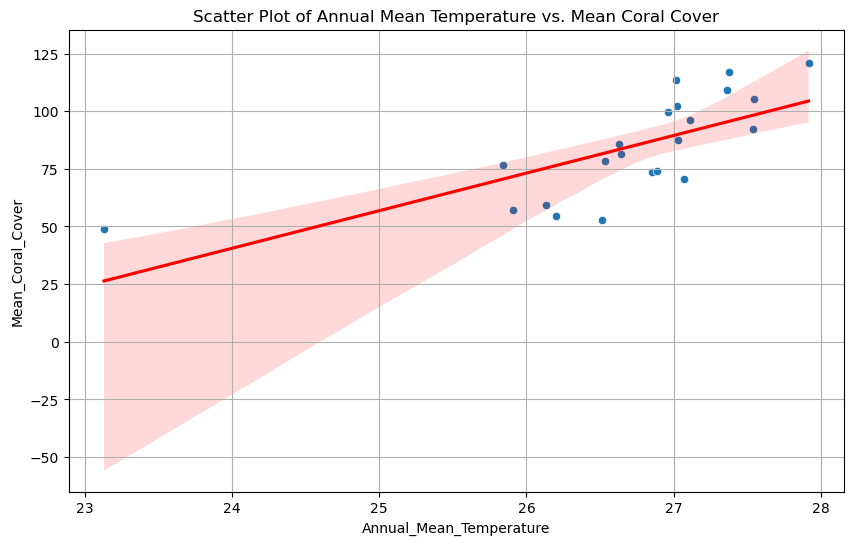

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Mean_Temperature', y='Mean_Coral_Cover', data=annual_merged_df)

# Add labels and title
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Mean Coral Cover')
plt.title('Scatter Plot of Annual Mean Temperature vs. Mean Coral Cover')
plt.grid(True)

# Optional: Add a trendline (linear regression fit)
sns.regplot(x='Annual_Mean_Temperature', y='Mean_Coral_Cover', data=annual_merged_df, scatter=False, color='red')

# Display the plot
plt.show()